In [1]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.datetime(2015, 8, 7)

end = datetime.datetime(2021, 7, 19)

In [3]:
BTC = web.DataReader("BTC-USD", 'yahoo', start, end)
ETH = web.DataReader("ETH-USD", 'yahoo', start, end)
LTC = web.DataReader("LTC-USD", 'yahoo', start, end)
XRP = web.DataReader("XRP-USD", 'yahoo', start, end)
BTC.drop(columns = 'Adj Close', inplace = True)
ETH.drop(columns = 'Adj Close', inplace = True)
LTC.drop(columns = 'Adj Close', inplace = True)
XRP.drop(columns = 'Adj Close', inplace = True)

In [7]:
coins = pd.concat([BTC.Close, ETH.Close, LTC.Close, XRP.Close], axis=1)
coins.columns = ['BTC', 'ETH', 'LTC', 'XRP']

In [10]:
coins.head()

,BTC,ETH,LTC,XRP
Date,,,,
2015-08-06,279.584991,2.772120,4.20828,0.008152
2015-08-07,260.997009,0.753325,3.85475,0.008476
2015-08-08,265.083008,0.701897,3.89859,0.008808
2015-08-09,264.470001,0.708448,3.94888,0.008750
2015-08-10,270.385986,1.067860,4.15955,0.008591


In [11]:
mean_daily_ret = coins.pct_change(1).mean()
mean_daily_ret

BTC    0.002951
ETH    0.005191
LTC    0.003116
XRP    0.004575
dtype: float64

In [12]:
coins.pct_change(1).corr()

,BTC,ETH,LTC,XRP
BTC,1.000000,0.510349,0.650548,0.345648
ETH,0.510349,1.000000,0.496316,0.298692
LTC,0.650548,0.496316,1.000000,0.410076
XRP,0.345648,0.298692,0.410076,1.000000


<AxesSubplot:xlabel='Date'>

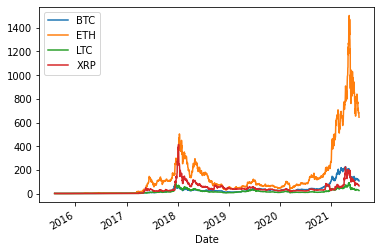

In [13]:
coins_normed = coins / coins.iloc[0]
coins_normed.plot()

In [14]:
coins_daily_ret = coins.pct_change(1)
coins_daily_ret.head()

,BTC,ETH,LTC,XRP
Date,,,,
2015-08-06,NaN,NaN,NaN,NaN
2015-08-07,-0.066484,-0.728250,-0.084008,0.039745
2015-08-08,0.015655,-0.068268,0.011373,0.039169
2015-08-09,-0.002313,0.009333,0.012900,-0.006585
2015-08-10,0.022369,0.507323,0.053349,-0.018171


In [15]:
log_ret = np.log(coins / coins.shift(1))
log_ret.head()

,BTC,ETH,LTC,XRP
Date,,,,
2015-08-06,NaN,NaN,NaN,NaN
2015-08-07,-0.068797,-1.302871,-0.087748,0.038975
2015-08-08,0.015534,-0.070710,0.011309,0.038422
2015-08-09,-0.002315,0.009290,0.012817,-0.006607
2015-08-10,0.022123,0.410335,0.051975,-0.018339


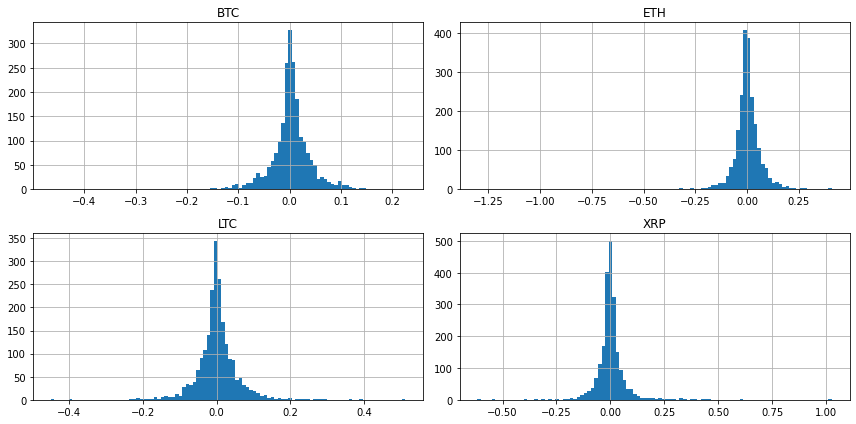

In [16]:
log_ret.hist(bins=100, figsize=(12,6));
plt.tight_layout()

In [17]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BTC,2170.0,0.002152,0.040083,-0.464730,-0.012173,0.002181,0.018075,0.225119
ETH,2170.0,0.002981,0.068098,-1.302871,-0.023512,0.000640,0.029329,0.410335
LTC,2170.0,0.001493,0.056628,-0.449062,-0.020472,-0.000524,0.022547,0.511417
XRP,2170.0,0.001923,0.070430,-0.616273,-0.020980,-0.002341,0.019283,1.027356


In [18]:
log_ret.mean() * 252

BTC    0.542230
ETH    0.751235
LTC    0.376200
XRP    0.484648
dtype: float64

In [19]:
# Compute pairwise covariance of columns
log_ret.cov()

,BTC,ETH,LTC,XRP
BTC,0.001607,0.001399,0.001558,0.001144
ETH,0.001399,0.004637,0.001957,0.001630
LTC,0.001558,0.001957,0.003207,0.001874
XRP,0.001144,0.001630,0.001874,0.004960


In [21]:
log_ret.cov() * 252 # multiply by days

,BTC,ETH,LTC,XRP
BTC,0.404885,0.352644,0.392612,0.288387
ETH,0.352644,1.168623,0.493124,0.410665
LTC,0.392612,0.493124,0.808091,0.472140
XRP,0.288387,0.410665,0.472140,1.250004


In [23]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('coins')
print(coins.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

coins
Index(['BTC', 'ETH', 'LTC', 'XRP'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.6235534140956233


Expected Volatility
0.7360601784112473


Sharpe Ratio
0.8471500461301075


In [25]:
#Now we can just run this many times over!
num_ports = 15000

all_weights = np.zeros((num_ports,len(coins.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [32]:
#https://www.investopedia.com/terms/s/sharperatio.asp
sharpe_arr.max()

0.8989792509633916

In [27]:
sharpe_arr.argmax()

7094

In [28]:
all_weights[7094,:]

array([0.66388257, 0.29731083, 0.0049462 , 0.0338604 ])

In [30]:
max_sr_ret = ret_arr[7094]
max_sr_vol = vol_arr[7094]

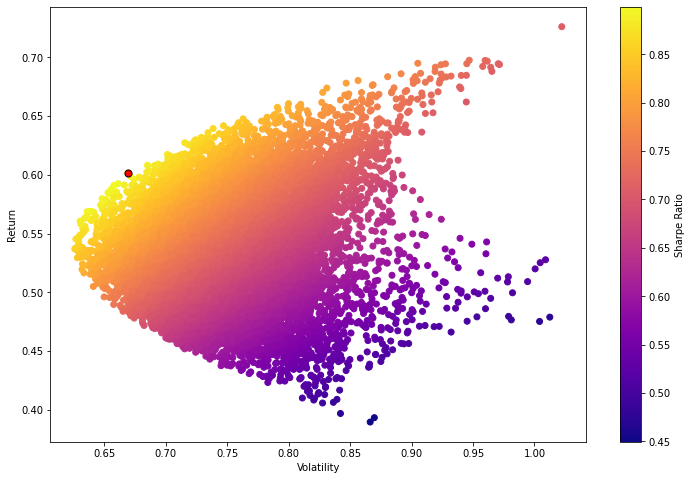

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

In [34]:
# Mathematical Optimization

In [35]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return, volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [36]:
from scipy.optimize import minimize

In [37]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [38]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [39]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type': 'eq', 'fun': check_sum})

In [40]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [41]:
# Initial Guess (equal distribution)
init_guess = [0.25, 0.25, 0.25, 0.25]

In [42]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [43]:
opt_results

     fun: -0.904797345827006
     jac: array([-8.71047378e-05,  2.65777111e-04,  3.17364924e-01,  1.29356980e-04])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.74035402, 0.22649904, 0.        , 0.03314694])

In [44]:
opt_results.x

array([0.74035402, 0.22649904, 0.        , 0.03314694])

In [45]:
get_ret_vol_sr(opt_results.x)

array([0.58766084, 0.64949443, 0.90479735])

In [46]:
#All Optimal Portfolios (Efficient Frontier)

In [49]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0, 0.3, 100) # Change 100 to a lower number for slower computers!

In [50]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [51]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type': 'eq', 'fun': check_sum},
            {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    
    frontier_volatility.append(result['fun'])

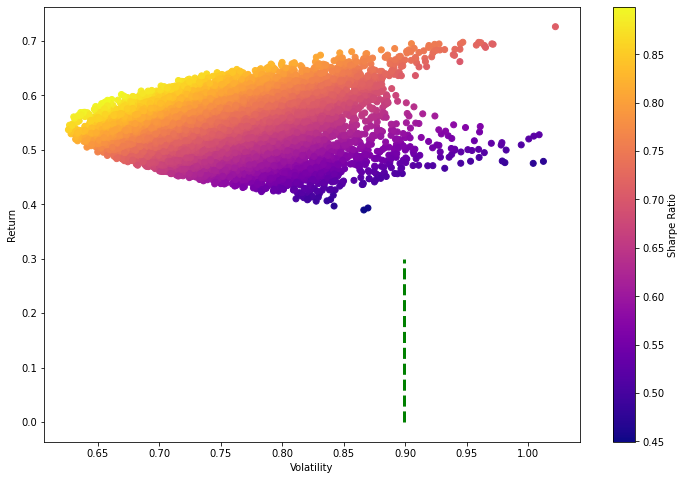

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)

In [63]:
#CAPM - Capital Asset Pricing Model

In [53]:
from scipy import stats

In [55]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [56]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-07-25 to 2021-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [58]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-07-25,217.059998,215.970001,217.000000,216.649994,55873100.0,197.452667
2016-07-26,217.169998,215.759995,216.529999,216.750000,70080500.0,197.543839
2016-07-27,217.270004,215.619995,217.190002,216.520004,84083900.0,197.334183
2016-07-28,217.110001,215.750000,216.289993,216.770004,65035700.0,197.562042
2016-07-29,217.539993,216.130005,216.460007,217.119995,79519400.0,197.881042


In [59]:
start = pd.to_datetime('2016-07-25')
end = pd.to_datetime('2021-07-23')

In [60]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [61]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-07-25,24.709999,24.2300,24.562500,24.334999,161531600.0,22.733387
2016-07-26,24.492500,24.1050,24.205000,24.167500,224959200.0,22.576918
2016-07-27,26.087500,25.6875,26.067499,25.737499,369379200.0,24.043583
2016-07-28,26.112499,25.7050,25.707500,26.084999,159479200.0,24.368214
2016-07-29,26.137501,25.9200,26.047501,26.052500,110934800.0,24.337851


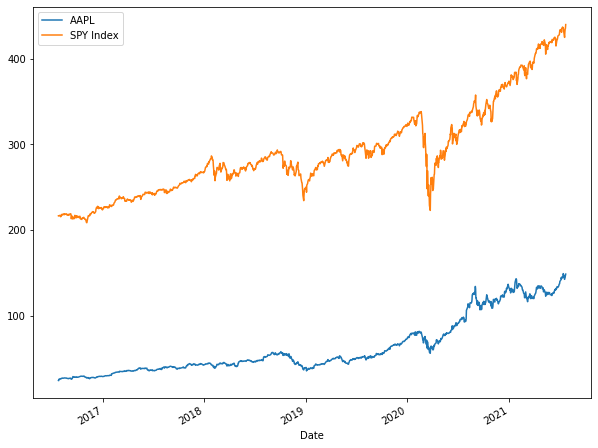

In [62]:
aapl['Close'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [64]:
#Compare Cumulative Return

In [65]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

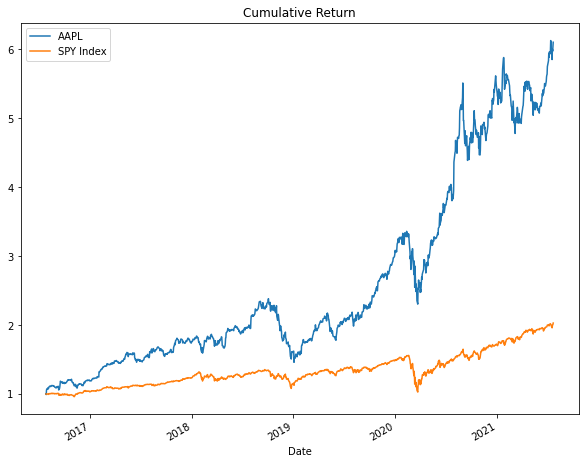

In [66]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

In [67]:
#Get Daily Return

In [68]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

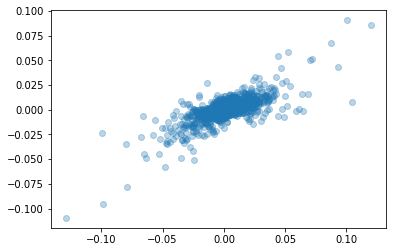

In [69]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'], alpha=0.3)

<AxesSubplot:>

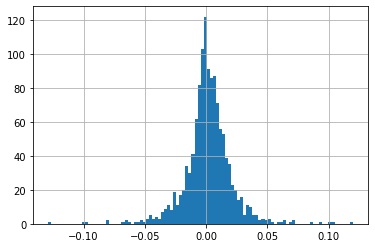

In [70]:
aapl['Daily Return'].hist(bins=100)

<AxesSubplot:>

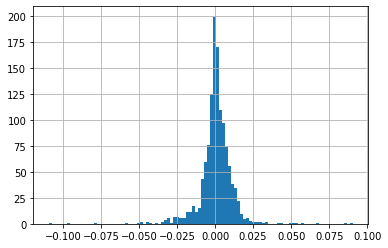

In [71]:
spy_etf['Daily Return'].hist(bins=100)

In [72]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [73]:
beta, alpha, r_value

(0.46665338203657664, -0.0001231492305407573, 0.7540307539172735)